In [112]:
import tools, timeit, os
import pandas as pd
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.rc = {}
%matplotlib inline

In [99]:
data_path = './data/PTF'
metadata_path = data_path + '/metadata'
tbl_filename = 'ptf_photcalcat_v1.tbl'
metadata_page = 'http://irsa.ipac.caltech.edu/ibe/search/ptf/images/level1?POS={},{}'
images_page = 'http://irsa.ipac.caltech.edu/ibe/data/ptf/images/level1'

## Data information

The PTF's .tbl (IPAC) file size is too big to be opened with other libraries. So first it will be converted to a dataframe, and then stored as a CSV. Storing it as a .pickle file would crash the Python process after a while.

In [ ]:
tbl_path = data_path + '/' + tbl_filename
df = tools.table_to_dataframe(tbl_path)

#### Persist as .csv

In [ ]:
# We'll count how long this takes
start_time = timeit.default_timer()
df.to_csv(data_path + '/ptf.csv')
end_time = timeit.default_timer()
print('TIME ELAPSED', end_time-start_time)

### Load from file

Next time, the dataframe may be loaded into memory by running:

In [16]:
# We'll count too how long this takes
start = timeit.default_timer();
df = pd.DataFrame.from_csv(data_path + '/ptf.csv');
end = timeit.default_timer();
print(end-start)

75.50547281099716


#### Table Description

In [79]:
df.head()

,ErrMu,MuType,PTFFIELD,Rerr,Rmerr,Rperr,Rptf,bstRMS,cI,dec,flag,nP,nT,ra
0,0.095,0.058,100111,0.021,0.017,0.026,16.152,0.022,9,-31.087161,1,23,12,42.532500
1,0.060,0.058,100111,0.030,0.022,0.037,17.172,0.022,9,-31.086008,1,21,12,42.786188
2,0.106,0.106,100111,0.063,0.055,0.071,18.507,0.022,9,-31.085419,1,22,12,42.593730
3,0.072,0.046,100111,0.015,0.017,0.014,14.225,0.022,9,-31.081556,1,23,12,42.525416
4,0.063,0.003,100111,0.025,0.029,0.022,15.286,0.022,9,-31.080395,1,23,12,42.953363


#### Sample

In [20]:
df.iloc[0]

ErrMu            0.095000
MuType           0.058000
PTFFIELD    100111.000000
Rerr             0.021000
Rmerr            0.017000
Rperr            0.026000
Rptf            16.152000
bstRMS           0.022000
cI               9.000000
dec            -31.087161
flag             1.000000
nP              23.000000
nT              12.000000
ra              42.532500
Name: 0, dtype: float64

#### Get RaDec coordinates for a given row

In [27]:
row_number = 0
row = df.iloc[row_number]
row[['ra', 'dec']]

42.532499999999999

#### And metadata url for given pos

### Download metadata for given position

#### Create URL

In [64]:
pos_metadata_url = metadata_page.format(row['ra'], row['dec'])
print(pos_metadata_url)

http://irsa.ipac.caltech.edu/ibe/search/ptf/images/level1?POS=42.5325,-31.087161


### Retrieve metadata

#### Create metadata directory if not exists

In [65]:
if not os.path.exists(metadata_path):
    os.makedirs(metadata_path)

#### Download

In [66]:
from urllib.request import urlretrieve
destination_path = metadata_path + '/{}_{}.tbl'.format(row['ra'], row['dec'])
urlretrieve(pos_metadata_url, destination_path)

('./data/PTF/metadata/42.5325_-31.087161.tbl',
 <http.client.HTTPMessage at 0x1f095de80>)

#### Load metadata

In [67]:
from astropy.table import Table
t = Table.read(destination_path, format='ipac')

In [80]:
metadf = t.to_pandas()
metadf.head()

,in_row_id,in_ra,in_dec,expid,obsdate,crval1,crval2,filter,ccdid,ptffield,...,dec2,ra3,dec3,ra4,dec4,gain,readnoi,darkcur,ipac_gid,ipac_pub_date
0,1.0,42.5325,-31.087161,40952.0,2009-09-21 09:59:23.116000,42.916240,-31.067953,R,9.0,100111.0,...,-29.993927,43.187355,-31.146457,42.514795,-31.148766,1.5,3.9,0.1,100.0,2015-08-07 00:00:00
1,1.0,42.5325,-31.087161,51958.0,2010-01-01 02:36:13.958000,42.942199,-30.987374,R,9.0,100111.0,...,-29.942166,43.177478,-31.095500,42.505185,-31.097745,1.5,3.9,0.1,100.0,2015-08-07 00:00:00
2,1.0,42.5325,-31.087161,186371.0,2011-08-21 11:17:49.311000,42.942311,-30.987065,R,9.0,100111.0,...,-29.959757,43.172462,-31.112563,42.499730,-31.115045,1.5,3.9,0.1,100.0,2015-08-07 00:00:00
3,1.0,42.5325,-31.087161,44264.0,2009-11-02 08:20:40.913000,42.942305,-30.987058,R,9.0,100111.0,...,-29.945939,43.177962,-31.098515,42.505527,-31.101076,1.5,3.9,0.1,100.0,2015-08-07 00:00:00
4,1.0,42.5325,-31.087161,55916.0,2010-01-12 03:35:40.105000,42.942278,-30.987003,R,9.0,100111.0,...,-29.941795,43.183548,-31.094279,42.511169,-31.097123,1.5,3.9,0.1,100.0,2015-08-07 00:00:00


In [86]:
metadf.columns.values

array(['in_row_id', 'in_ra', 'in_dec', 'expid', 'obsdate', 'crval1',
       'crval2', 'filter', 'ccdid', 'ptffield', 'seeing', 'airmass',
       'moonillf', 'moonesb', 'photcalflag', 'infobits', 'nid', 'fieldid',
       'ptfpid', 'pfilename', 'afilename1', 'afilename2', 'afilename3',
       'afilename4', 'rfilename', 'obsmjd', 'ptfprpi', 'filtersl',
       'moonra', 'moondec', 'moonphas', 'moonalt', 'ra1', 'dec1', 'ra2',
       'dec2', 'ra3', 'dec3', 'ra4', 'dec4', 'gain', 'readnoi', 'darkcur',
       'ipac_gid', 'ipac_pub_date'], dtype=object)

In [78]:
metadf.describe()

,in_row_id,in_ra,in_dec,expid,crval1,crval2,ccdid,ptffield,seeing,airmass,...,ra2,dec2,ra3,dec3,ra4,dec4,gain,readnoi,darkcur,ipac_gid
count,106.0,1.060000e+02,1.060000e+02,106.000000,106.000000,106.000000,106.0,106.0,104.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,1.060000e+02,1.060000e+02,106.0
mean,1.0,4.253250e+01,-3.108716e+01,164842.009434,42.979511,-30.487128,9.0,100111.0,2.844904,2.307264,...,43.165840,-29.957924,43.175094,-31.110218,42.502245,-31.112846,1.5,3.900000e+00,1.000000e-01,100.0
std,0.0,1.427837e-14,7.139183e-15,58657.550060,0.030457,0.207718,0.0,0.0,0.637906,0.091896,...,0.004191,0.009655,0.004067,0.009590,0.004261,0.009629,0.0,1.338597e-15,1.394372e-17,0.0
min,1.0,4.253250e+01,-3.108716e+01,40952.000000,42.802978,-31.067953,9.0,100111.0,1.920000,2.220000,...,43.158394,-29.994315,43.167640,-31.146734,42.494912,-31.149254,1.5,3.900000e+00,1.000000e-01,100.0
25%,1.0,4.253250e+01,-3.108716e+01,185301.000000,42.977097,-30.415376,9.0,100111.0,2.407500,2.240000,...,43.163036,-29.961495,43.172643,-31.113735,42.499370,-31.116301,1.5,3.900000e+00,1.000000e-01,100.0
50%,1.0,4.253250e+01,-3.108716e+01,192829.000000,42.977219,-30.415162,9.0,100111.0,2.715000,2.260000,...,43.165251,-29.959890,43.174351,-31.112159,42.501494,-31.114840,1.5,3.900000e+00,1.000000e-01,100.0
75%,1.0,4.253250e+01,-3.108716e+01,199422.500000,42.977432,-30.414904,9.0,100111.0,3.070000,2.370000,...,43.168184,-29.956687,43.177468,-31.108466,42.504832,-31.111181,1.5,3.900000e+00,1.000000e-01,100.0
max,1.0,4.253250e+01,-3.108716e+01,206614.000000,43.025978,-30.357943,9.0,100111.0,5.050000,2.490000,...,43.182686,-29.940586,43.191147,-31.093128,42.518626,-31.095414,1.5,3.900000e+00,1.000000e-01,100.0


### Sample data

In [122]:
meta_row_number = 0
meta_row = metadf.iloc[meta_row_number]
meta_row

in_row_id                                                        1
in_ra                                                      42.5325
in_dec                                                    -31.0872
expid                                                        40952
obsdate                                 2009-09-21 09:59:23.116000
crval1                                                     42.9162
crval2                                                     -31.068
filter                                                           R
ccdid                                                            9
ptffield                                                    100111
seeing                                                        2.33
airmass                                                       2.26
moonillf                                                      0.09
moonesb                                                          0
photcalflag                                                   

In [125]:
meta_pfilename = meta_row['pfilename']
meta_pfilename

'proc/2009/09/21/f2/c9/p5/v2/PTF_200909214162_i_p_scie_t095923_u011929627_f02_p100111_c09.fits'

## Viewing & manipulating image

In [127]:
image_url = images_page + '/' + meta_pfilename
image_file = download_file(image_url)

In [128]:
image_data = fits.getdata(image_file)

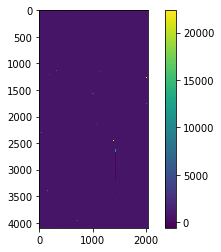

In [130]:
plt.imshow(image_data)
plt.colorbar()